## **Plotting**

Here, we consider that all the networks of interest were already generated and saved. This way, we will augment the networks with extra information
and perform extra calculations to generate data ready for plotting.

Let us consider the two types of networks:<br>
1. **Cities flux networks**<br>
2. **Cities to Hospitals flux networks**<br>

### **1. Between cities flux networks**

### **2. Cities to Hospitals flux networks**

## **Lib**

In [2]:
# -- Bib
import os
import sys
sys.path.append("..")

import networkx as nx
import geopandas as gpd
import pandas as pd
import datetime as dt
import pickle
import glob

import matplotlib
import matplotlib.pyplot as plt

In [3]:
idx = pd.IndexSlice


## **Load base data**

In [19]:
# -- base paths
basepath = os.path.join(os.environ["HOMEPATH"], "Documents", "data")
#basepath = os.path.join(os.environ["HOME"], "Documents", "data")
cnespath = os.path.join(basepath, "opendatasus", "cnes")
geopath = os.path.join(basepath, "shapefilesceqgis")
gmlpath = os.path.join(basepath, "redes_aih")
figpath = os.path.join(basepath, "redes_aih", "macrofigs")

## **0. Context: Population and regions**

In [93]:
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))
geodata_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GEOCOD7            184 non-null    object  
 1   NM_MUNICIP         184 non-null    object  
 2   GEOCOD6            184 non-null    object  
 3   MACRO_ID           184 non-null    int64   
 4   CRES_ID            184 non-null    int64   
 5   geometry_municip   184 non-null    geometry
 6   MACRO_NOME         184 non-null    object  
 7   geometry_macro     184 non-null    geometry
 8   geometry_cres      184 non-null    geometry
 9   MACRO_ID_PROPOSAL  184 non-null    int64   
 10  centroid_municip   184 non-null    geometry
 11  municip_lon        184 non-null    float64 
 12  municip_lat        184 non-null    float64 
 13  2010               184 non-null    float64 
 14  2011               184 non-null    float64 
 15  2012               184 non-null    float64 
 16  

### **0.1 City population 2010**

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


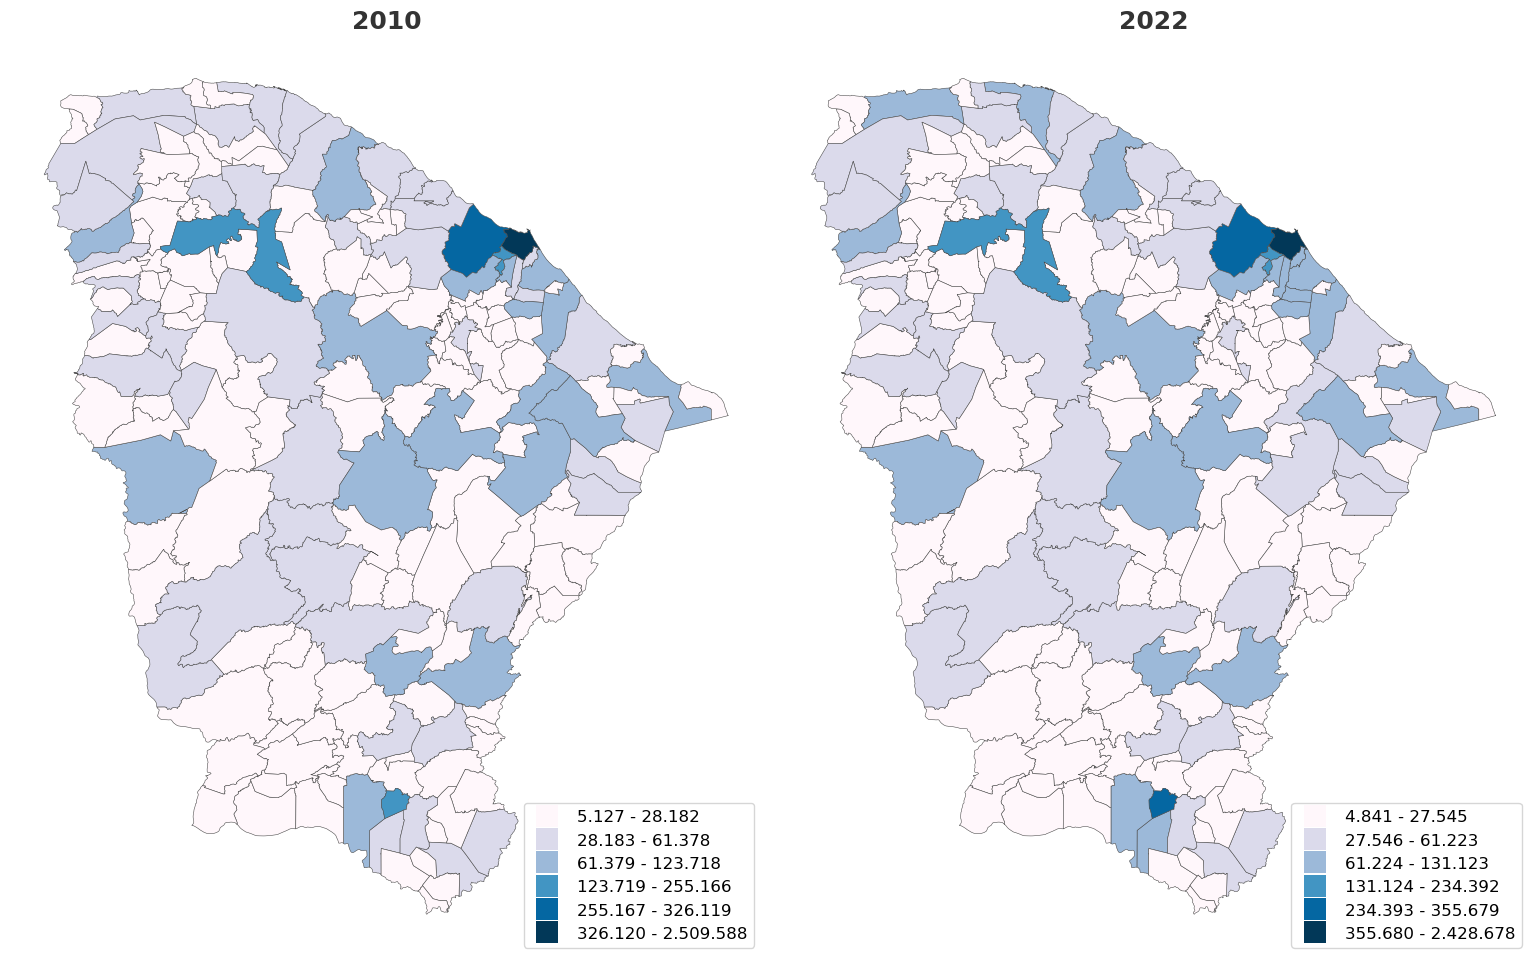

In [129]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax_mapa, ax_mapa2) = plt.subplots(1,2, figsize=(15.5,10))
geodata_df.set_geometry("geometry_municip")

geodata_df.plot(ax=ax_mapa, column='2010', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="PuBu",
             linewidth=0.4,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

geodata_df.plot(ax=ax_mapa2, column='2022', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="PuBu",
             linewidth=0.4,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

ax_mapa.axis('off')
ax_mapa2.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)
ax_mapa2.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa, ax_mapa2]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(16)
        #line.set_linestyle('-')
        #line.set_linewidth(12)
        #line.set_color(cur_color)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 12}, loc=4)

ax_mapa.set_title("2010", weight='bold', fontsize=18, color="#333333")
ax_mapa2.set_title("2022", weight='bold', fontsize=18, color="#333333")
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, "pop_2010_2022.png"), dpi=200, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_all_mapa_2013_vs_2022.pdf"), dpi=250, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.pdf"), dpi=200, bbox_inches='tight')

### **0.2 Number of equipaments Ceará**

In [300]:
valid_cnes_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cnes_com_aih_1801_2306.parquet"))
valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)
valid_cnes_df = gpd.GeoDataFrame(valid_cnes_df, geometry='geometry')

**Geolocation of health units**

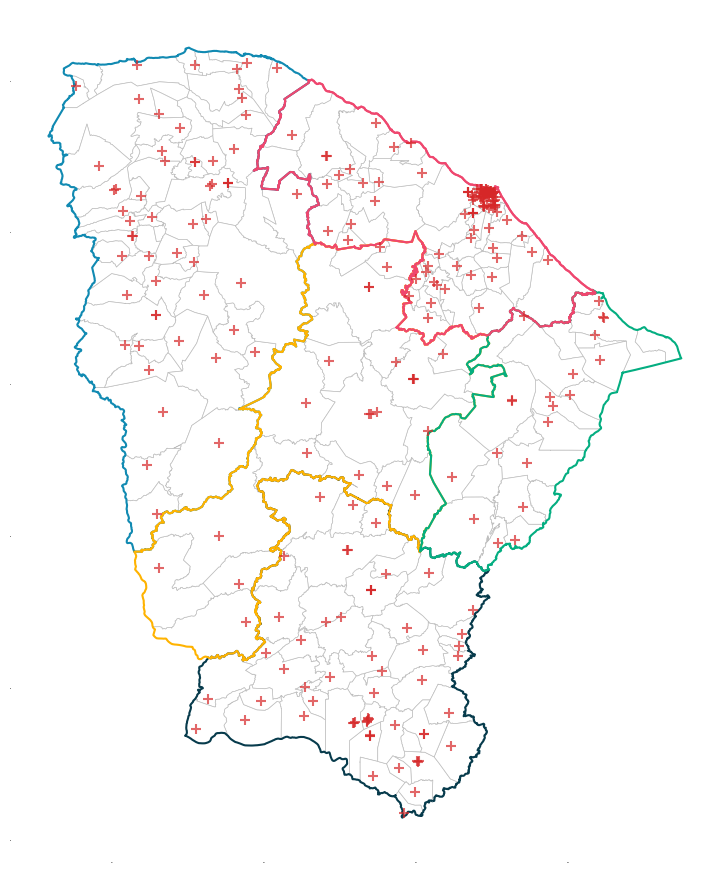

In [81]:
# -- geometry ceará
fig1, ax1 = plt.subplots(1, figsize=(13,11))

geodata_df.plot(ax=ax1, color="#ffffff", edgecolor="#bfbfbf", linewidth=0.5)
macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax1, color="none", edgecolor=macro_df["MACRO_COLOR"], linewidth=1.5)
macro_df[macro_df["MACRO_ID"]==1].plot(ax=ax1, color="none", edgecolor="#ef476f", linewidth=1.5)

valid_cnes_df.plot(ax=ax1, markersize=42, marker='+', alpha=0.7, color="tab:red")

for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_linewidth(0)

ax1.tick_params(which='both', length=0, labelsize=0)


# -- node color
cmap_macro_str = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c"}
cmap_macro_str = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c"}

# -- edge color
cmap_edge_color = {'1': "#ef476f", '2': "#ffd166", '3': "#06d6a0", '4': "#118ab2", '5': "#073b4c", "-1": "#9c9c9c"}
cmap_edge_color = {'1': "#ef476f", '2': "#ffb300", '3': "#04ae81", '4': "#118ab2", '5': "#073b4c", "-1": "#404040"}

fig1.savefig(os.path.join(figpath, "hospitals_2018_2306.png"), dpi=200, bbox_inches='tight')


**Number of hospital beds**

In [301]:
leitos_muni_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "leitos_por_municipio_1801_2306.parquet"))
geodata_df1 = geodata_df.merge(leitos_muni_df, on="GEOCOD6", how="left")

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


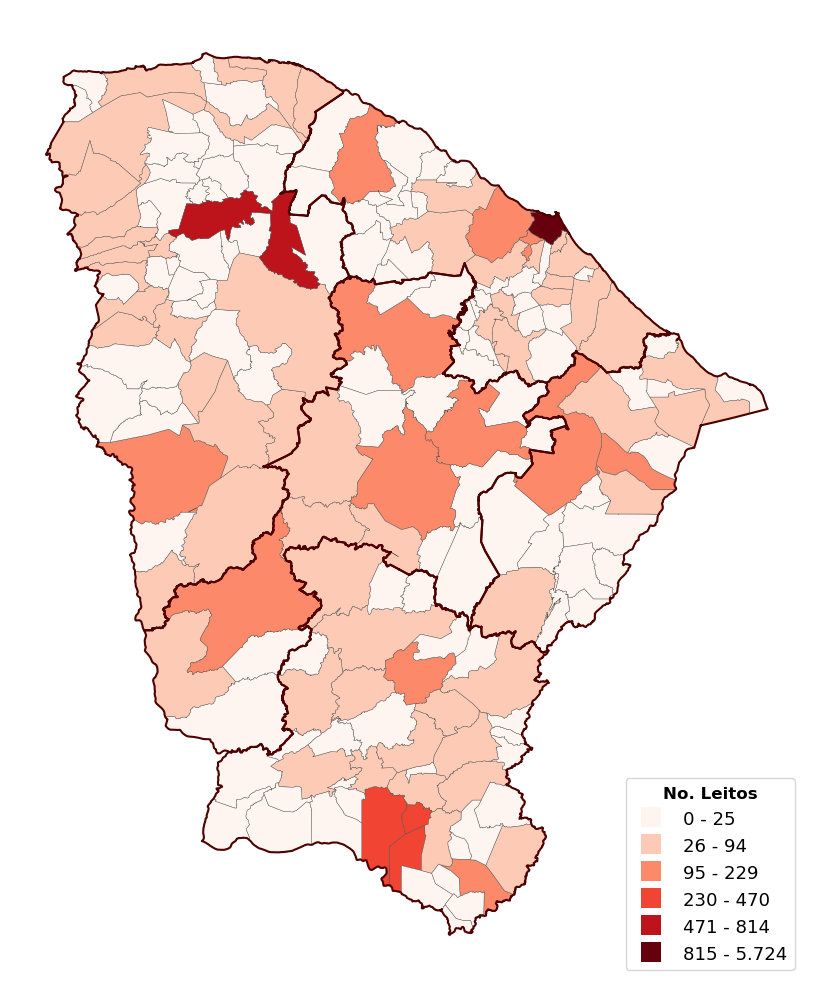

In [127]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15.5,10))
geodata_df.set_geometry("geometry_municip")

geodata_df1.plot(ax=ax_mapa, column='NUMLEITOS', edgecolor="#4d4d4d", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="Reds",
             linewidth=0.3,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax_mapa, color="none", edgecolor="#4d0000", linewidth=1.5)


ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(15)
        #line.set_linestyle('-')
        #line.set_linewidth(12)
        #line.set_color(cur_color)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 13}, loc=4, title='No. Leitos', title_fontproperties={'weight': 'bold', 'size': 12})

#ax_mapa.set_title("2010", weight='bold', fontsize=18, color="#333333")
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, "mapa_leitos_2306.png"), dpi=200, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_all_mapa_2013_vs_2022.pdf"), dpi=250, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig_mapa.savefig(os.path.join(basepath, "opas", "tb", "figs", "mapa_casos_tbdr_municipio_2012_2023.pdf"), dpi=200, bbox_inches='tight')

**Stats per macro**

In [306]:
geodata_df1

,GEOCOD7,NM_MUNICIP,GEOCOD6,MACRO_ID,CRES_ID,geometry_municip,MACRO_NOME,geometry_macro,geometry_cres,MACRO_ID_PROPOSAL,...,2015,2016,2017,2018,2019,2020,2021,2022,MACRO_COLOR,NUMLEITOS
0,2300101,ABAIARA,230010,5,19,"POLYGON ((-39.08246 -7.29577, -39.08347 -7.292...",Superintendência Regional de Saúde Cariri,"POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...","POLYGON ((-4354692.823 -865196.973, -4354812.2...",3,...,11259.0,11380.0,11498.0,11619.0,11737.0,11853.0,11965.0,10038.0,#073b4c,0.0
1,2300150,ACARAPE,230015,1,3,"POLYGON ((-38.67268 -4.27393, -38.67268 -4.273...",Superintendência Regional de Saúde Fortaleza,"MULTIPOLYGON (((-39.69667 -2.99902, -39.69216 ...","POLYGON ((-4325426.833 -465433.632, -4325426.8...",1,...,14486.0,14598.0,14707.0,14820.0,14929.0,15036.0,15140.0,14027.0,#ef476f,0.0
2,2300200,ACARAÚ,230020,4,12,"POLYGON ((-39.99113 -3.09797, -39.99117 -3.098...",Superintendência Regional de Saúde Norte,"MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...","POLYGON ((-4503430.806 -312287.468, -4503430.7...",2,...,60722.0,61208.0,61679.0,62165.0,62641.0,63104.0,63556.0,64806.0,#118ab2,38.0
3,2300309,ACOPIARA,230030,5,18,"POLYGON ((-39.21390 -5.99175, -39.21278 -5.991...",Superintendência Regional de Saúde Cariri,"POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...","POLYGON ((-4440719.425 -681940.298, -4440964.9...",4,...,53393.0,53616.0,53830.0,54052.0,54270.0,54481.0,54687.0,44962.0,#073b4c,54.0
4,2300408,AIUABA,230040,2,14,"POLYGON ((-40.14849 -6.36051, -40.14816 -6.360...",Superintendência Regional de Saúde Sertão Central,"POLYGON ((-40.08511 -6.36860, -40.08445 -6.370...","POLYGON ((-4448196.104 -680357.114, -4447996.7...",7,...,17012.0,17110.0,17205.0,17303.0,17399.0,17493.0,17584.0,14076.0,#ffb300,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2313807,URUBURETAMA,231380,1,6,"POLYGON ((-39.55089 -3.58253, -39.53197 -3.582...",Superintendência Regional de Saúde Fortaleza,"MULTIPOLYGON (((-39.69667 -2.99902, -39.69216 ...","POLYGON ((-4402776.237 -343001.709, -4402648.3...",2,...,21069.0,21267.0,21459.0,21656.0,21850.0,22040.0,22223.0,20189.0,#ef476f,14.0
180,2313906,URUOCA,231390,4,11,"POLYGON ((-40.70713 -3.23916, -40.70319 -3.240...",Superintendência Regional de Saúde Norte,"MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...","MULTIPOLYGON (((-4518310.108 -507950.779, -451...",8,...,13529.0,13607.0,13684.0,13763.0,13840.0,13915.0,13988.0,13746.0,#118ab2,13.0
181,2313955,VARJOTA,231395,4,11,"POLYGON ((-40.55755 -4.20910, -40.55869 -4.208...",Superintendência Regional de Saúde Norte,"MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...","MULTIPOLYGON (((-4518310.108 -507950.779, -451...",8,...,18210.0,18263.0,18315.0,18368.0,18420.0,18471.0,18520.0,18105.0,#118ab2,10.0
182,2314003,VÁRZEA ALEGRE,231400,5,17,"POLYGON ((-39.28999 -6.65783, -39.28999 -6.657...",Superintendência Regional de Saúde Cariri,"POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...","POLYGON ((-4305065.442 -748330.453, -4305140.3...",4,...,39975.0,40164.0,40347.0,40536.0,40721.0,40903.0,41078.0,38984.0,#073b4c,46.0


In [352]:
health_units_per_macro = valid_cnes_df["MACRO_ID"].value_counts().reset_index().sort_values(by="MACRO_ID")
leitos_per_macro = geodata_df1.groupby("MACRO_ID")[["NUMLEITOS", "2022"]].sum().reset_index().sort_values(by="MACRO_ID")
#pop_per_macro = geodata_df1.groupby("MACRO_ID")["NUMLEITOS"].sum().reset_index().sort_values(by="MACRO_ID")

In [353]:
leitos_per_macro

,MACRO_ID,NUMLEITOS,2022
0,1,6964.0,4551491.0
1,2,857.0,618632.0
2,3,692.0,530704.0
3,4,2105.0,1643152.0
4,5,2462.0,1447709.0


C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_1268\3950624067.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)


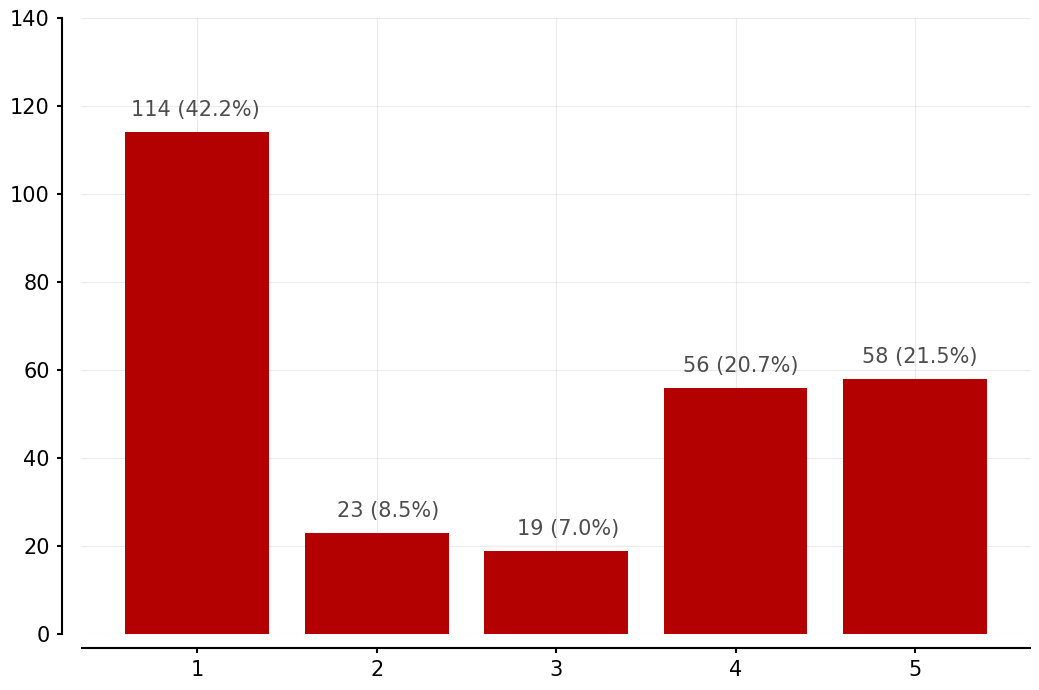

In [335]:
fig, ax = plt.subplots(1, figsize=(10.5,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(health_units_per_macro["MACRO_ID"], health_units_per_macro["count"], zorder=2, color="#b30000")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 140])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',')))
#ax.legend(prop={'size':14}, loc=4)

serie_data = health_units_per_macro
serie_sum = serie_data['count'].sum()
for idx in range(len(serie_data['count'])):
    porc = (serie_data['count'].iloc[idx]/serie_sum)*100
    ax.text(y=serie_data['count'].iloc[idx]+5, x=idx+1.35, s=f'{serie_data["count"].iloc[idx]:,} ({porc:.1f}%)', 
                ha='right', va='center', fontsize=15, color="#4d4d4d")
    
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.png"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.pdf"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.pdf"), dpi=200, bbox_inches='tight')

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_1268\3444791598.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)


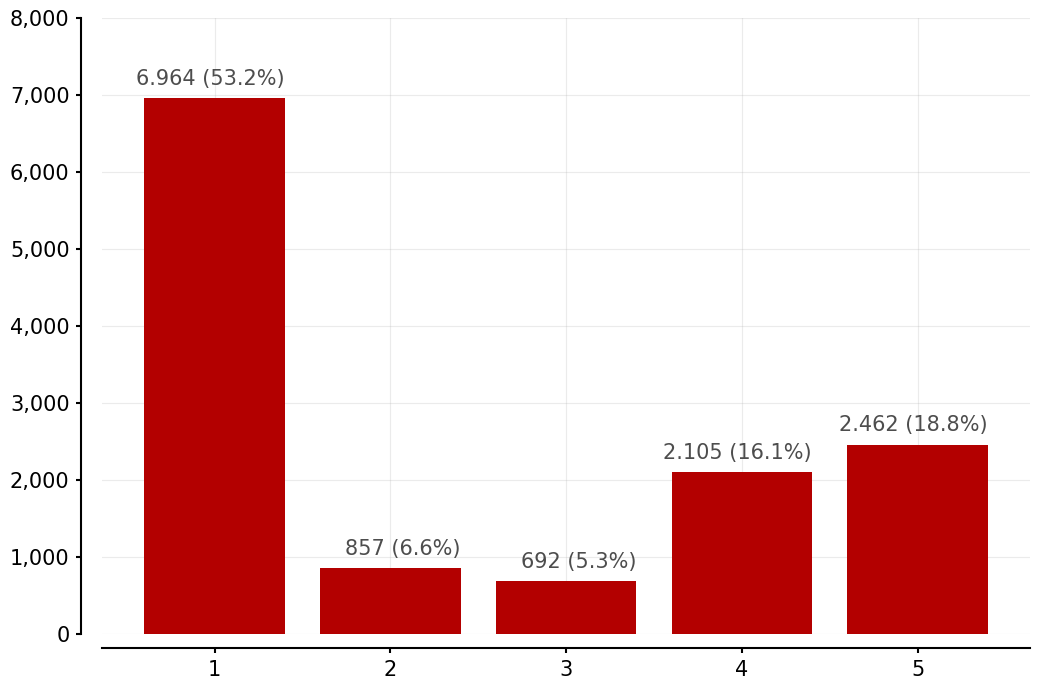

In [350]:
fig, ax = plt.subplots(1, figsize=(10.5,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(leitos_per_macro["MACRO_ID"], leitos_per_macro["NUMLEITOS"], zorder=2, color="#b30000")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 8000])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',')))
#ax.legend(prop={'size':14}, loc=4)

serie_data = leitos_per_macro
serie_sum = serie_data['NUMLEITOS'].sum()
for idx in range(len(serie_data['NUMLEITOS'])):
    porc = (serie_data['NUMLEITOS'].iloc[idx]/serie_sum)*100
    ax.text(y=serie_data['NUMLEITOS'].iloc[idx]+250, x=idx+1.4, s=f'{serie_data["NUMLEITOS"].iloc[idx]:,.0f} ({porc:.1f}%)'.replace(",","."), 
                ha='right', va='center', fontsize=15, color="#4d4d4d")
    
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.png"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.pdf"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.pdf"), dpi=200, bbox_inches='tight')

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_1268\1149199270.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)


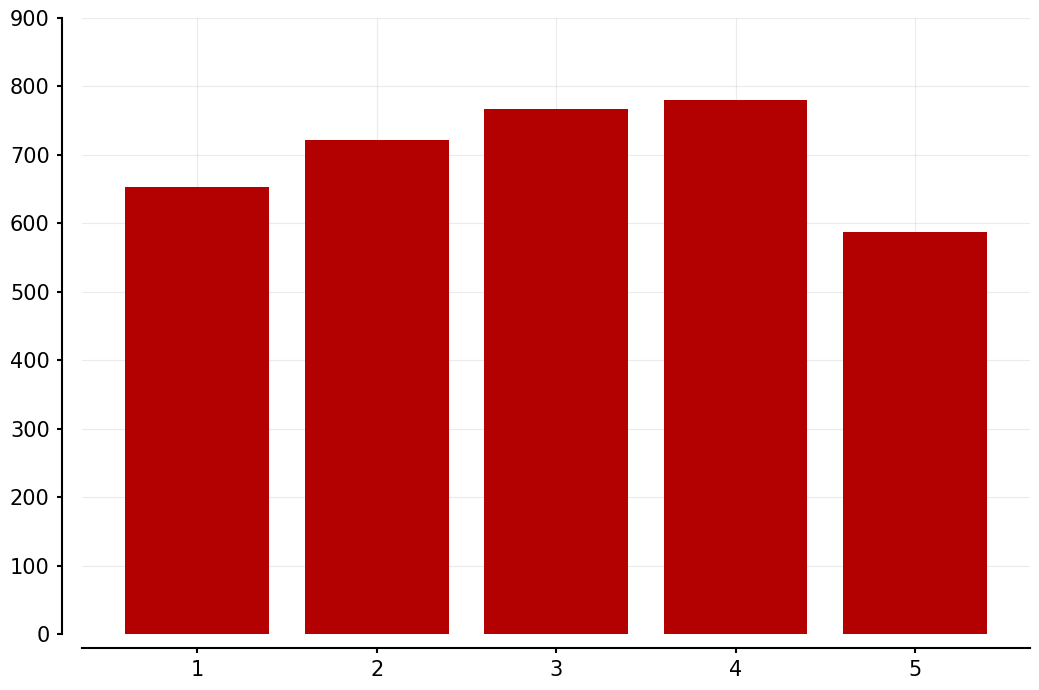

In [358]:
fig, ax = plt.subplots(1, figsize=(10.5,7.))

for i in ['left', 'right', 'bottom', 'top']:
    ax.spines[i].set_linewidth(1.5)

for axis in [ax]:
    axis.spines['top'].set_linewidth(0)
    axis.spines['right'].set_linewidth(0)
    axis.spines['left'].set_position(('outward', 15))
    axis.spines['bottom'].set_position(('outward', 10))
    axis.grid(alpha=0.25, zorder=0)

    axis.tick_params(direction='out', width=1.5, labelsize=15, pad=5)

ax.bar(leitos_per_macro["MACRO_ID"], leitos_per_macro["2022"]/leitos_per_macro["NUMLEITOS"], zorder=2, color="#b30000")
#ax_sel.bar(raca_count_sel[col_nm], raca_count_sel["count"], zorder=2, color="#005c99")
#ax.barh(idade_ms_fem.index, -1*idade_ms_fem, label="Feminino", zorder=2)

ax.tick_params(direction='out', width=1.5, labelsize=15, pad=5)
#ax.yaxis.set_tick_params(labelsize=15)
#ax.yaxis.set_tick_params(width=0)
ax.set_ylim([0, 900])

ax.grid(alpha=0.25, zorder=0)
for axis in [ax]:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axis.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
    axis.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(abs(x)), ',')))
#ax.legend(prop={'size':14}, loc=4)

#serie_data = leitos_per_macro
#serie_sum = serie_data['NUMLEITOS'].sum()
#for idx in range(len(serie_data['NUMLEITOS'])):
#    porc = (serie_data['NUMLEITOS'].iloc[idx]/serie_sum)*100
#    ax.text(y=serie_data['NUMLEITOS'].iloc[idx]+0, x=idx+1.4, s=f'{serie_data["NUMLEITOS"].iloc[idx]:,.0f} ({porc:.1f}%)'.replace(",","."), 
#                ha='right', va='center', fontsize=15, color="#4d4d4d")
    
ax.set_xticklabels([ f for f in ax.get_xticklabels() ], rotation=0)
fig.tight_layout()
#ax.set_title("Todos os óbitos", weight='bold', fontsize=15)
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.png"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "sim", "figs", "obitos_both_lococor_2013_2023.pdf"), dpi=250, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.png"), dpi=300, bbox_inches='tight')
#fig.savefig(os.path.join(basepath, "opas", "tb", "figs", "raca_2012_2023.pdf"), dpi=200, bbox_inches='tight')

**CCA HEALTH**

In [297]:
pop_censo_setores_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cca_health_setores.parquet"))
leitos_cca_hospitais_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cca_health_hospitais.parquet"))

In [298]:
l = 25
quant_leitos_cca = leitos_cca_hospitais_df.groupby(f"cca_health_module_l{l}")["NUMLEITOS_TOTAL"].sum().reset_index()
map_leitos_cca = dict(zip(quant_leitos_cca[f"cca_health_module_l{l}"], quant_leitos_cca["NUMLEITOS_TOTAL"]))
leitos_cca_hospitais_df[f"NUMLEITOS_TOTAL_CCA_L{l}"] = leitos_cca_hospitais_df[f"cca_health_module_l{l}"].map(map_leitos_cca)

In [299]:
leitos_cca_hospitais_df.head()

,CNES,latitude,longitude,geometry,cca_health_module_l5,cca_health_module_l10,cca_health_module_l15,cca_health_module_l20,cca_health_module_l25,NUMLEITOS_TOTAL,NUMLEITOS_TOTAL_CCA_L25
0,9999310,-4.970753,-39.014854,POINT (-39.01485 -4.97075),22,22,22,17,17,0.0,226.0
611,9675787,-3.795548,-38.492201,POINT (-38.49220 -3.79555),0,0,0,0,0,2.0,8525.0
613,9672427,-5.089599,-38.121126,POINT (-38.12113 -5.08960),267,123,122,14,44,142.0,650.0
635,9658815,-3.732426,-38.511244,POINT (-38.51124 -3.73243),0,0,0,0,0,4.0,8525.0
908,9526293,-3.771279,-38.474536,POINT (-38.47454 -3.77128),0,0,0,0,0,25.0,8525.0


In [260]:
pop_cca_valid = pop_censo_setores_df[pop_censo_setores_df[f"cca_health_module_l{l}"]!=-1]
quant_pop_cca = pop_cca_valid.groupby(f"cca_health_module_l{l}")["Pop_setor_censo2010"].sum().reset_index()
map_pop_cca = dict(zip(quant_pop_cca[f"cca_health_module_l{l}"], quant_pop_cca["Pop_setor_censo2010"]))
pop_censo_setores_df[f"POP_TOTAL_CCA_L{l}"] = pop_censo_setores_df[f"cca_health_module_l{l}"].map(map_pop_cca).fillna(0)

In [261]:
pop_censo_setores_df = pop_censo_setores_df.merge(leitos_cca_hospitais_df[[f"cca_health_module_l{l}", f"NUMLEITOS_TOTAL_CCA_L{l}"]], on=f"cca_health_module_l{l}", how="left")
pop_censo_setores_df["População por leitos"] = (pop_censo_setores_df[f"POP_TOTAL_CCA_L{l}"]/pop_censo_setores_df[f"NUMLEITOS_TOTAL_CCA_L{l}"]).fillna(0)

In [262]:
pop_censo_setores_df.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,Cod_setor,Pop_setor_censo2010,cca_health_module_l5,cca_health_module_l10,cca_health_module_l15,cca_health_module_l20,cca_health_module_l25,POP_TOTAL_CCA_L25,NUMLEITOS_TOTAL_CCA_L25,População por leitos
0,9098,230030925000003,RURAL,None,None,23003092500,None,230030925,SANTA FELÍCIA,2300309,...,230030925000003,377.0,-1,-1,-1,25,24,122265.0,307.0,398.257329
1,9098,230030925000003,RURAL,None,None,23003092500,None,230030925,SANTA FELÍCIA,2300309,...,230030925000003,377.0,-1,-1,-1,25,24,122265.0,307.0,398.257329
2,9098,230030925000003,RURAL,None,None,23003092500,None,230030925,SANTA FELÍCIA,2300309,...,230030925000003,377.0,-1,-1,-1,25,24,122265.0,307.0,398.257329
3,9098,230030925000003,RURAL,None,None,23003092500,None,230030925,SANTA FELÍCIA,2300309,...,230030925000003,377.0,-1,-1,-1,25,24,122265.0,307.0,398.257329
4,9099,230030925000004,RURAL,None,None,23003092500,None,230030925,SANTA FELÍCIA,2300309,...,230030925000004,199.0,-1,-1,25,25,25,124770.0,205.0,608.634146


In [264]:
leitos_cca_hospitais_df

,CNES,latitude,longitude,geometry,cca_health_module_l5,cca_health_module_l10,cca_health_module_l15,cca_health_module_l20,cca_health_module_l25,NUMLEITOS_TOTAL,NUMLEITOS_TOTAL_CCA_L25
0,9999310,-4.970753,-39.014854,POINT (-39.01485 -4.97075),22,22,22,17,17,0.0,226.0
611,9675787,-3.795548,-38.492201,POINT (-38.49220 -3.79555),0,0,0,0,0,2.0,8525.0
613,9672427,-5.089599,-38.121126,POINT (-38.12113 -5.08960),267,123,122,14,44,142.0,650.0
635,9658815,-3.732426,-38.511244,POINT (-38.51124 -3.73243),0,0,0,0,0,4.0,8525.0
908,9526293,-3.771279,-38.474536,POINT (-38.47454 -3.77128),0,0,0,0,0,25.0,8525.0
...,...,...,...,...,...,...,...,...,...,...,...
16457,0156647,-4.361886,-39.313771,POINT (-39.31377 -4.36189),4,4,4,4,3,0.0,566.0
16458,0153087,-3.496534,-39.597289,POINT (-39.59729 -3.49653),3,3,3,3,3,30.0,566.0
16524,0104477,-3.742621,-38.536761,POINT (-38.53676 -3.74262),0,0,0,0,0,0.0,8525.0
16525,0100358,-3.685556,-40.345703,POINT (-40.34570 -3.68556),1,1,1,1,10,0.0,1269.0


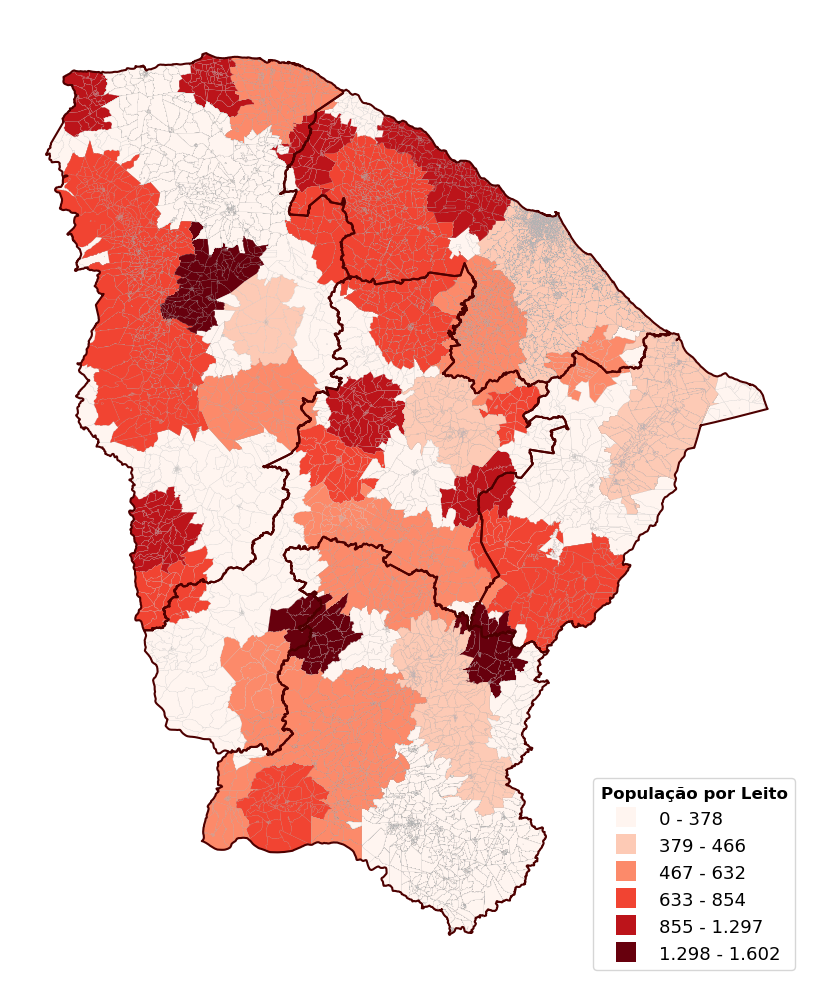

In [263]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15.5,10))

#cmap_range = colors = plt.cm.reds(np.linspace(0,1,18)) # -- colormap for the ranking

pop_censo_setores_df.plot(ax=ax_mapa, column='População por leitos', edgecolor="#b3b2b2", 
             legend=True,
             scheme="NaturalBreaks",
             k=6,
             cmap="Reds",
             linewidth=0.1,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#ffffff",
                 "edgecolor": "#404040",
                 "hatch": "///",
                 "label": '',
                 'alpha': 0.45
             })

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax_mapa, color="none", edgecolor="#4d0000", linewidth=1.5)

ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

for axis in [ax_mapa]:
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(15)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 13}, loc=4, title='População por Leito', title_fontproperties={'weight': 'bold', 'size': 12})

fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, f"pop_por_leitos_cca_cluster_l{l}km.png"), dpi=250, bbox_inches='tight')

### **0.3 Plot macros separately**

In [269]:
cmap_macro_str = {1: "#ef476f", 2: "#ffd166", 3: "#06d6a0", 4: "#118ab2", 5: "#073b4c"}

1447709.0

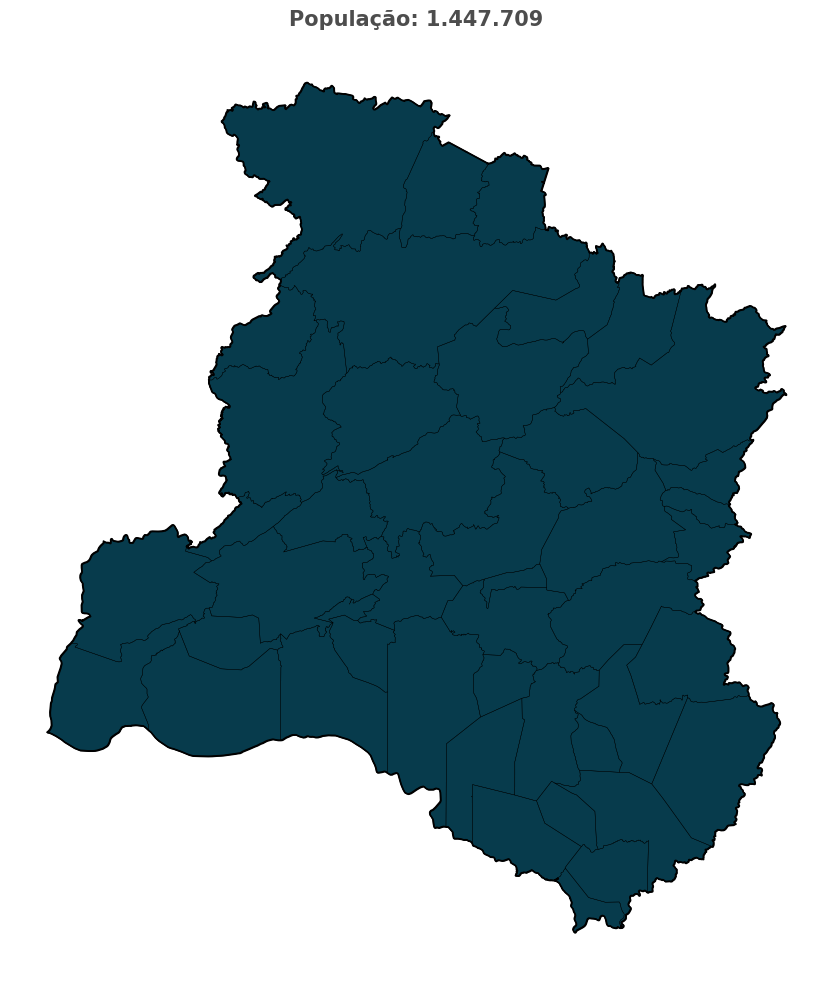

In [296]:
macro_id = 5

def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

def transf_label_macro(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[1]:,}'.replace(",",".")

popn_macro = geodata_df[geodata_df["MACRO_ID"]==macro_id]["2022"].sum()

# -- geometry ceará
fig_mapa, ax_mapa = plt.subplots(1,1, figsize=(15,10))
geodata_df.set_geometry("geometry_municip")

macro_df = geodata_df[["MACRO_ID","2010", "2022"]].groupby("MACRO_ID").sum().reset_index().merge(geodata_df[["geometry_macro", "MACRO_ID"]].drop_duplicates("MACRO_ID"), on="MACRO_ID", how="left")
macro_df = gpd.GeoDataFrame(macro_df).set_geometry("geometry_macro")
macro_df = macro_df[macro_df["MACRO_ID"]==macro_id]
geodata_macro_df = geodata_df[geodata_df["MACRO_ID"]==macro_id]

macro_df.plot(ax=ax_mapa, color=cmap_macro_str[macro_id], edgecolor="#000000")

#macro_df.plot(ax=ax_mapa, column='2010', edgecolor="#000000", 
#             legend=True,
#             scheme="NaturalBreaks",
#             k=6,
#             cmap="PuBu",
#             linewidth=1.0,
#             legend_kwds={
#                 'loc': 4,
#                 'prop': {'size':19},
#                 'markerscale': 1.6,
#                 "fmt": "{:.0f}",
#                 "interval": True
#             },
#             missing_kwds={
#                 "color": "#ffffff",
#                 "edgecolor": "#999999",
#                 "hatch": "///",
#                 "label": '0',
#                 'alpha': 0.5
#             })

geodata_macro_df.plot(ax=ax_mapa, edgecolor="#000000", color='none', linewidth=0.25) 
macro_df.plot(ax=ax_mapa, color='none', edgecolor="#000000", linewidth=1.1) 


ax_mapa.axis('off')
ax_mapa.tick_params(which='both', length=0, labelsize=0)

# -- legend macro
#leg = ax_mapa.get_legend()
#lines = leg.get_lines()
#for line in lines:
#    cur_color = line.get_markerfacecolor() 
#    line.set_marker('s')
#    line.set_markersize(18)
#    #line.set_linestyle('-')
#    #line.set_linewidth(12)
#    #line.set_color(cur_color)
#current_labels = [t.get_text() for t in leg.get_texts()]
#new_labels =  [ transf_label_macro(index, label) for index, label in enumerate(current_labels) ]
#ax_mapa.legend(lines, new_labels, prop={'size': 17}, loc=4)

fig_mapa.suptitle(f"População: {popn_macro:,.0f}".replace(",","."), fontsize=15, color="#4d4d4d", weight='bold')
fig_mapa.tight_layout()
fig_mapa.savefig(os.path.join(figpath, f"macro_simples_id{macro_id}.png"), dpi=200, bbox_inches='tight')

### **0.4 Quantify stats**

## **0. Time series of hospitals and hospital beds per macro**

In [10]:
macro_names_original = {1: 'Fortaleza', 2: 'Sertão Central', 3: 'Litoral Leste', 4: 'Norte', 5: 'Cariri'}
macro_names_proposal = {1: 'Grande Fortaleza - Maciço de Baturité',
                        2: 'Litoral Oeste - Vale do Curu - Litoral Norte',
                        3: 'Cariri', 4: 'Centro Sul', 
                        5: 'Sertão Central', 6: 'Litoral Leste - Jaguaribe',
                        7: 'Sertão dos Inhamus - Crateús',
                        8: 'Serra da Ibiapaba - Sertão de Sobral'}

In [6]:
macro_original_leitos = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "timeserie_macro_original_beds.parquet"))
macro_proposal_leitos = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "timeserie_macro_proposal_beds.parquet"))

macro_original_leitos.head()

1                                            2                     \
     period macro_leitos_princ macro_leitos_todos period macro_leitos_princ   
0801   0801             6406.0             9918.0   0801              499.0   
0802   0802             6450.0             9962.0   0802              499.0   
0803   0803             6450.0             9971.0   0803              499.0   
0804   0804             6611.0            10148.0   0804              499.0   
0805   0805             6632.0            10192.0   0805              499.0   

                             3                                            4  \
     macro_leitos_todos period macro_leitos_princ macro_leitos_todos period   
0801              882.0   0801              546.0              901.0   0801   
0802              882.0   0802              546.0              901.0   0802   
0803              884.0   0803              546.0              908.0   0803   
0804              884.0   0804              552.0              914.0   0804   
0805              884.0   0805              552.0              914.0   0805   

                                                5                     \
     macro_leitos_princ macro_leitos_todos period macro_leitos_princ   
0801             1389.0             2414.0   0801             2180.0   
0802             1389.0             2412.0   0802             2186.0   
0803             1389.0             2418.0   0803             2192.0   
0804             1362.0             2388.0   0804             2189.0   
0805             1365.0             2391.0   0805             2184.0   

                         
     macro_leitos_todos  
0801             3362.0  
0802             3368.0  
0803             3383.0  
0804             3371.0  
0805             3367.0

### **0.1 Macro original - Number of Hospital beds**

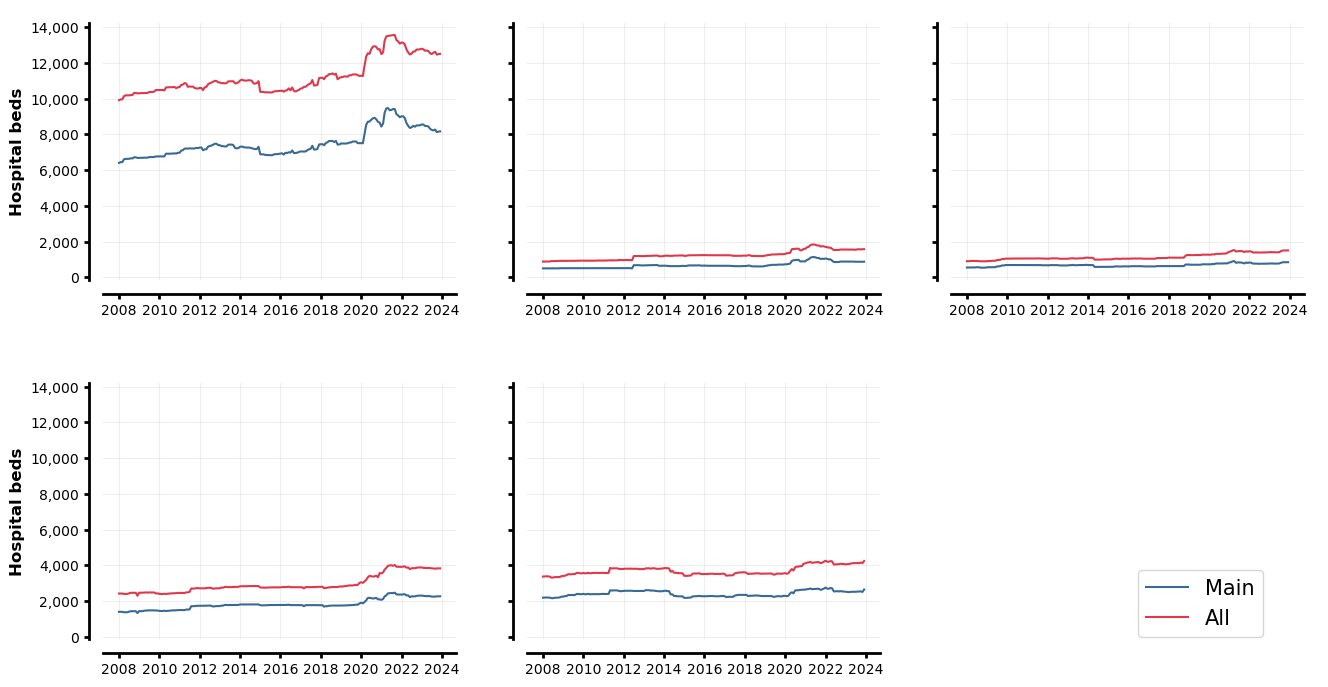

In [11]:
fig, AX = plt.subplots(2,3, figsize=(15.5,8), sharey=True)

xvalues = macro_original_leitos[1, 'period'].tolist()
xvalues = [ dt.datetime(2000+int(x[:2]), int(x[2:]), 1) for x in xvalues ]

#AX[0,0].set_title(macro_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
lineprinc, = AX[0,0].plot(xvalues, macro_original_leitos[1, 'macro_leitos_princ'], color="#396a93")
linetodos, = AX[0,0].plot(xvalues, macro_original_leitos[1, 'macro_leitos_todos'], color="#e1374b")

AX[0,1].plot(xvalues, macro_original_leitos[2, 'macro_leitos_princ'], color="#396a93")
AX[0,1].plot(xvalues, macro_original_leitos[2, 'macro_leitos_todos'], color="#e1374b")

AX[0,2].plot(xvalues, macro_original_leitos[3, 'macro_leitos_princ'], color="#396a93")
AX[0,2].plot(xvalues, macro_original_leitos[3, 'macro_leitos_todos'], color="#e1374b")

AX[1,0].plot(xvalues, macro_original_leitos[4, 'macro_leitos_princ'], color="#396a93")
AX[1,0].plot(xvalues, macro_original_leitos[4, 'macro_leitos_todos'], color="#e1374b")

AX[1,1].plot(xvalues, macro_original_leitos[5, 'macro_leitos_princ'], color="#396a93")
AX[1,1].plot(xvalues, macro_original_leitos[5, 'macro_leitos_todos'], color="#e1374b")

AX[1,2].axis('off')

fig.legend([lineprinc, linetodos], ['Main', 'All'], loc=4, bbox_to_anchor=((0.88,0.1)), prop={'size':15})

#AX[0,0].set_yscale('log')
for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

AX[0,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[1,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')

fig.subplots_adjust(hspace=0.4)

### **0.2 Macro Proposal - Number of Hospital beds**

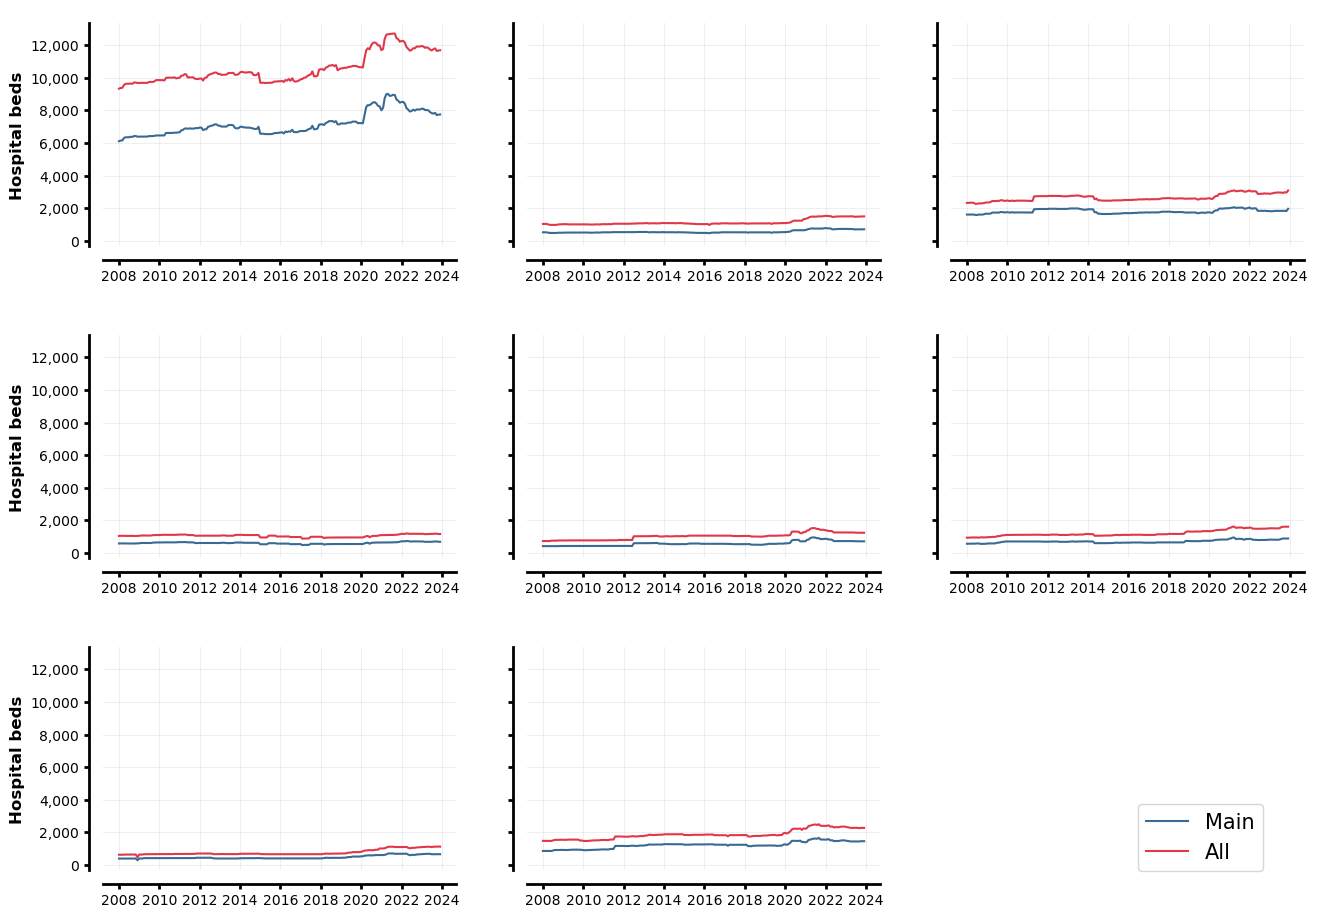

In [12]:
fig, AX = plt.subplots(3,3, figsize=(15.5,11), sharey=True)

xvalues = macro_proposal_leitos[1, 'period'].tolist()
xvalues = [ dt.datetime(2000+int(x[:2]), int(x[2:]), 1) for x in xvalues ]

#AX[0,0].set_title(macro_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
lineprinc, = AX[0,0].plot(xvalues, macro_proposal_leitos[1, 'macro_leitos_princ'], color="#396a93")
linetodos, = AX[0,0].plot(xvalues, macro_proposal_leitos[1, 'macro_leitos_todos'], color="#e1374b")

AX[0,1].plot(xvalues, macro_proposal_leitos[2, 'macro_leitos_princ'], color="#396a93")
AX[0,1].plot(xvalues, macro_proposal_leitos[2, 'macro_leitos_todos'], color="#e1374b")

AX[0,2].plot(xvalues, macro_proposal_leitos[3, 'macro_leitos_princ'], color="#396a93")
AX[0,2].plot(xvalues, macro_proposal_leitos[3, 'macro_leitos_todos'], color="#e1374b")

AX[1,0].plot(xvalues, macro_proposal_leitos[4, 'macro_leitos_princ'], color="#396a93")
AX[1,0].plot(xvalues, macro_proposal_leitos[4, 'macro_leitos_todos'], color="#e1374b")

AX[1,1].plot(xvalues, macro_proposal_leitos[5, 'macro_leitos_princ'], color="#396a93")
AX[1,1].plot(xvalues, macro_proposal_leitos[5, 'macro_leitos_todos'], color="#e1374b")

AX[1,2].plot(xvalues, macro_proposal_leitos[6, 'macro_leitos_princ'], color="#396a93")
AX[1,2].plot(xvalues, macro_proposal_leitos[6, 'macro_leitos_todos'], color="#e1374b")

AX[2,0].plot(xvalues, macro_proposal_leitos[7, 'macro_leitos_princ'], color="#396a93")
AX[2,0].plot(xvalues, macro_proposal_leitos[7, 'macro_leitos_todos'], color="#e1374b")

AX[2,1].plot(xvalues, macro_proposal_leitos[8, 'macro_leitos_princ'], color="#396a93")
AX[2,1].plot(xvalues, macro_proposal_leitos[8, 'macro_leitos_todos'], color="#e1374b")

AX[2,2].axis('off')

fig.legend([lineprinc, linetodos], ['Main', 'All'], loc=4, bbox_to_anchor=((0.88,0.1)), prop={'size':15})

for i in range(3):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

AX[0,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[1,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')
AX[2,0].set_ylabel("Hospital beds", fontsize=12, weight='bold')

fig.subplots_adjust(hspace=0.4)

## **1. Between cities flux networks**

In [30]:
# -- load geo
netsuffix = "agg_2001_2012"
geodata_df = gpd.read_parquet(os.path.join(gmlpath, "dados_for_plot", f"geoforplot_{netsuffix}.parquet"))
geodata_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GEOCOD7               184 non-null    object  
 1   NM_MUNICIP            184 non-null    object  
 2   GEOCOD6               184 non-null    object  
 3   MACRO_ID              184 non-null    int64   
 4   CRES_ID               184 non-null    int64   
 5   geometry_municip      184 non-null    geometry
 6   MACRO_NOME            184 non-null    object  
 7   geometry_macro        184 non-null    geometry
 8   geometry_cres         184 non-null    geometry
 9   MACRO_ID_PROPOSAL     184 non-null    int64   
 10  municip_lon           184 non-null    float64 
 11  municip_lat           184 non-null    float64 
 12  2010                  184 non-null    float64 
 13  2011                  184 non-null    float64 
 14  2012                  184 non-null    float64 
 15

### **1.1 Some maps**

#### **Current macro**

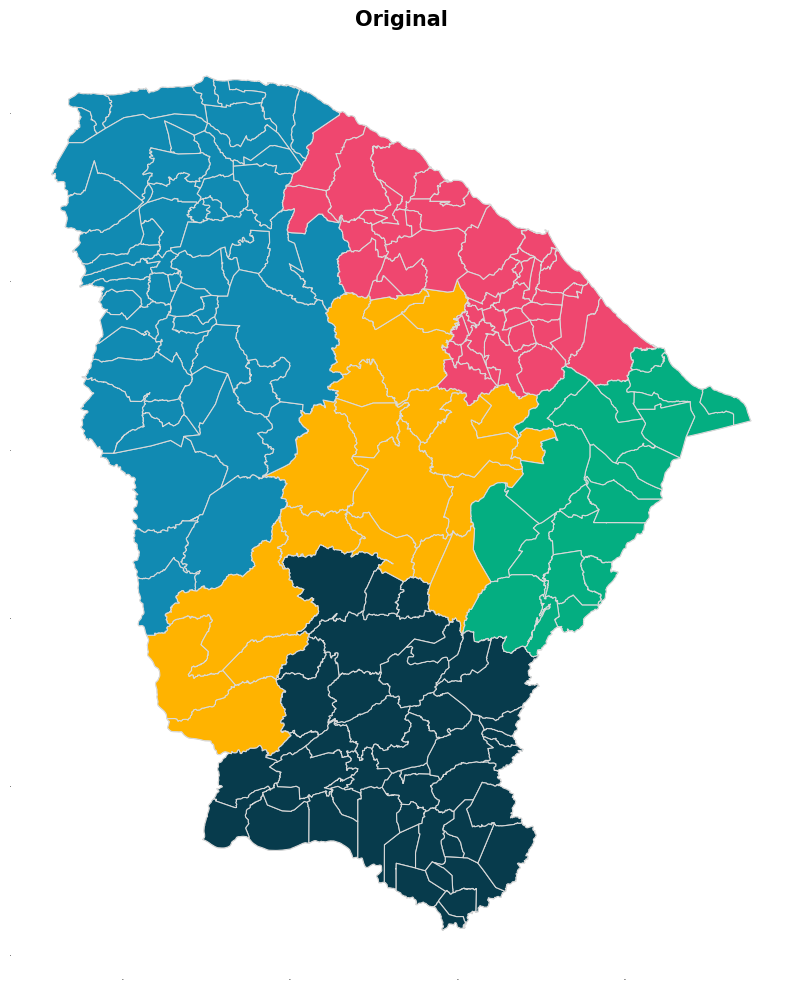

In [31]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Original", fontsize=15, weight='bold')

fig_new.tight_layout()
fig_new.savefig(os.path.join(basepath, "original.png"), dpi=250, bbox_inches='tight')

#### **Proposal for macro**

KeyError: 'MACRO_PROPOSAL_COLOR'

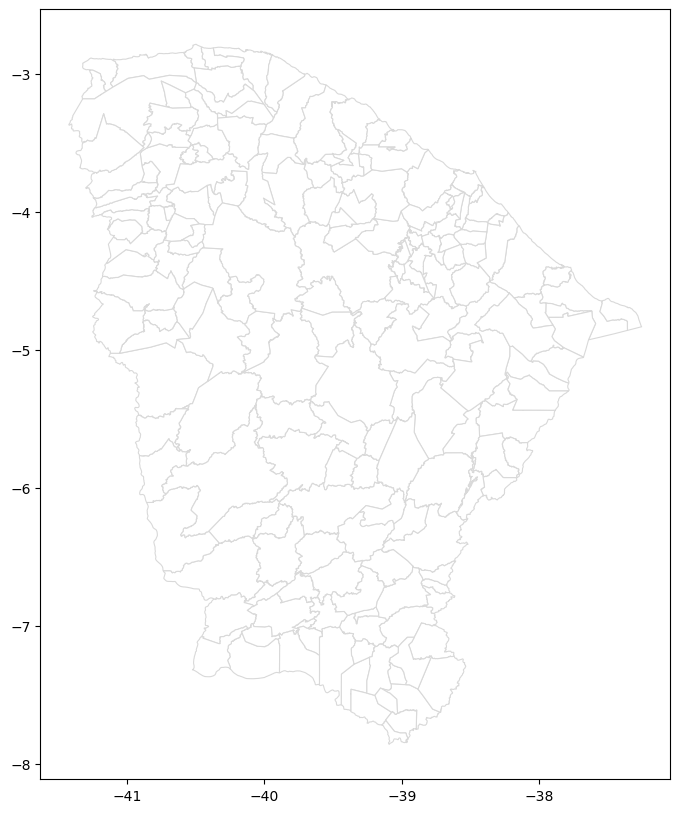

In [32]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["MACRO_PROPOSAL_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Proposal", fontsize=16, weight='bold')

fig_new.tight_layout()

#### **Infomap**

#073b4c


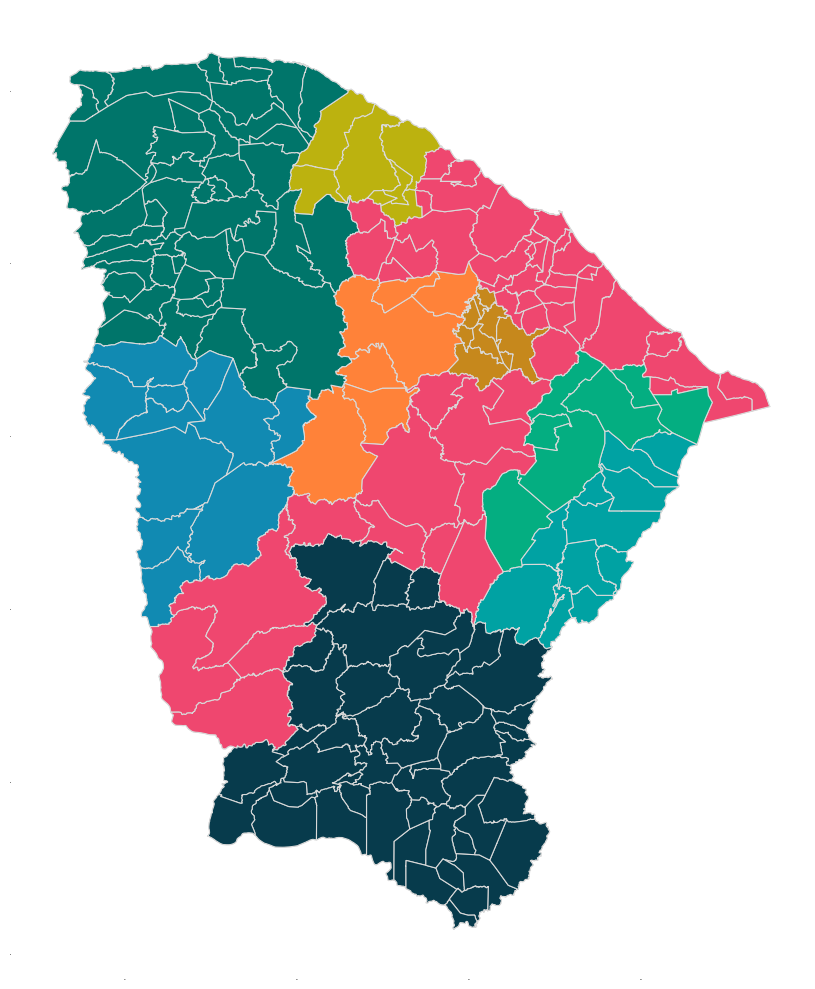

In [33]:
# -- fix abaiara infomap module
right_color = geodata_df[geodata_df["NM_MUNICIP"]=="JUAZEIRO DO NORTE"]["INFOMAP_COUNT_COLOR"].iat[0]
geodata_df["INFOMAP_COUNT_COLOR"] = geodata_df[["NM_MUNICIP", "INFOMAP_COUNT_COLOR"]].apply(lambda x: right_color if x["NM_MUNICIP"]=="ABAIARA" else x["INFOMAP_COUNT_COLOR"], axis=1)
print(right_color)

# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["INFOMAP_COUNT_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

#AX.set_title("Infomap", fontsize=16, weight='bold')

fig_new.tight_layout()
#fig_new.savefig(os.path.join(basepath, "infomap.png"), dpi=250, bbox_inches='tight')


#### **Louvain**

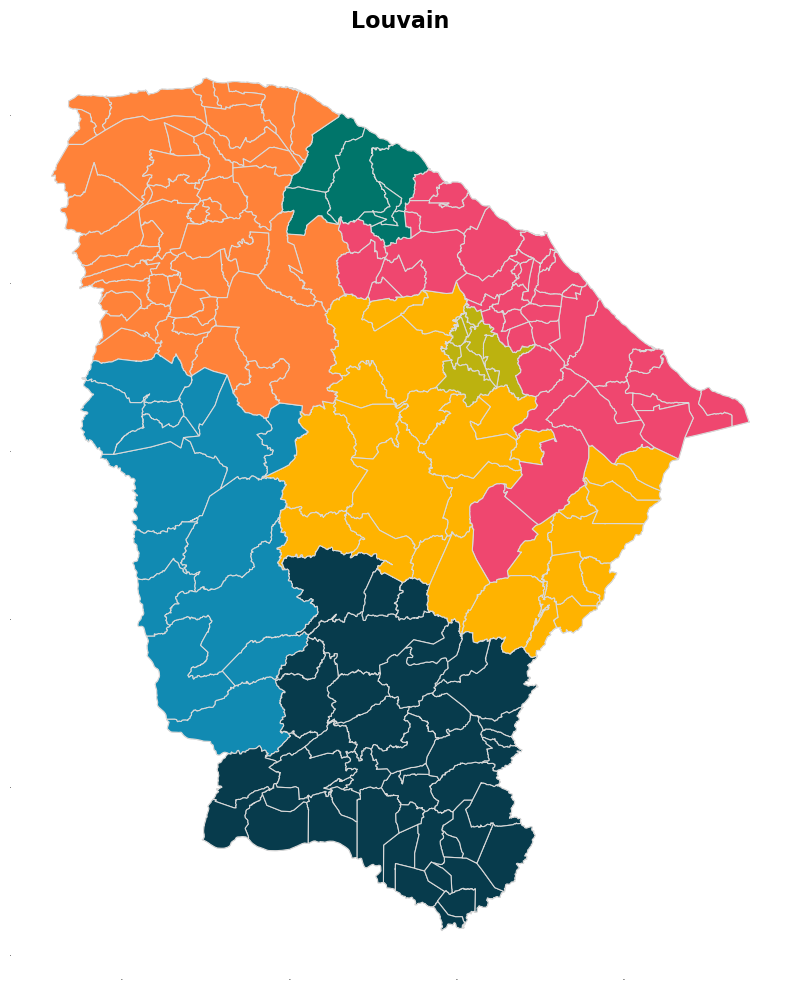

In [49]:
# -- new geometry ceará
fig_new, AX = plt.subplots(1, figsize=(12,10))

geodata_df.set_geometry('geometry_municip').plot(ax=AX, color="#ffffff", edgecolor="#d9d9d9", linewidth=0.8)
geodata_df.set_geometry('geometry_municip').plot(ax=AX, color=geodata_df["LOUVAIN_COUNT_COLOR"], edgecolor="#d9d9d9", linewidth=0.8)

for i in ['left', 'right', 'top', 'bottom']:
    for axis in [AX]:
        axis.spines[i].set_linewidth(0)
        axis.tick_params(which='both', length=0, labelsize=0)

AX.set_title("Louvain", fontsize=16, weight='bold')

fig_new.tight_layout()

### **1.2 Time fluxes between macros**

In [1]:
fnames = sorted(glob.glob(os.path.join(gmlpath, "novo_completo", "*noverlap*")))
list_of_xaxis = [ fname.split("\\")[-1].split(".")[0].split("_")[-1] for fname in fnames ]
list_of_xaxis = [ dt.date(2000+int(x[:2]), int(x[2:]), 1) for x in list_of_xaxis ]
testx = [ n for n in range(len(list_of_xaxis)) ] 

NameError: name 'glob' is not defined

In [77]:
macro_aux = geodata_df.drop_duplicates("MACRO_ID")[["MACRO_ID", "MACRO_NOME"]]
macro_original_dict = dict(zip(macro_aux["MACRO_ID"], macro_aux["MACRO_NOME"]))

with open(os.path.join(gmlpath, 'dados_for_plot', 'macro_original_fluxes.pickle'), 'rb') as handle:
    macro_flows = pickle.load(handle)

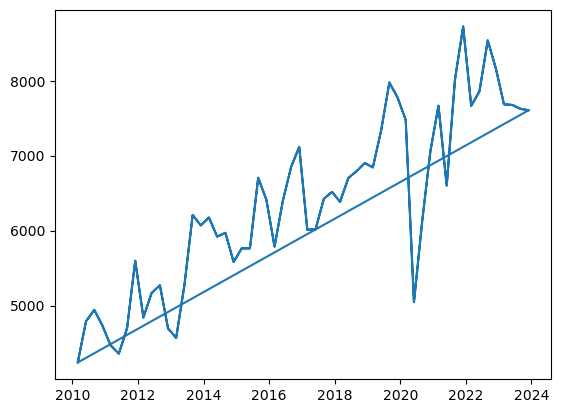

In [79]:
len(macro_flows["1"]["INCOMING"])
len(list_of_xaxis)

plt.plot(list_of_xaxis, macro_flows["1"]["INCOMING"])

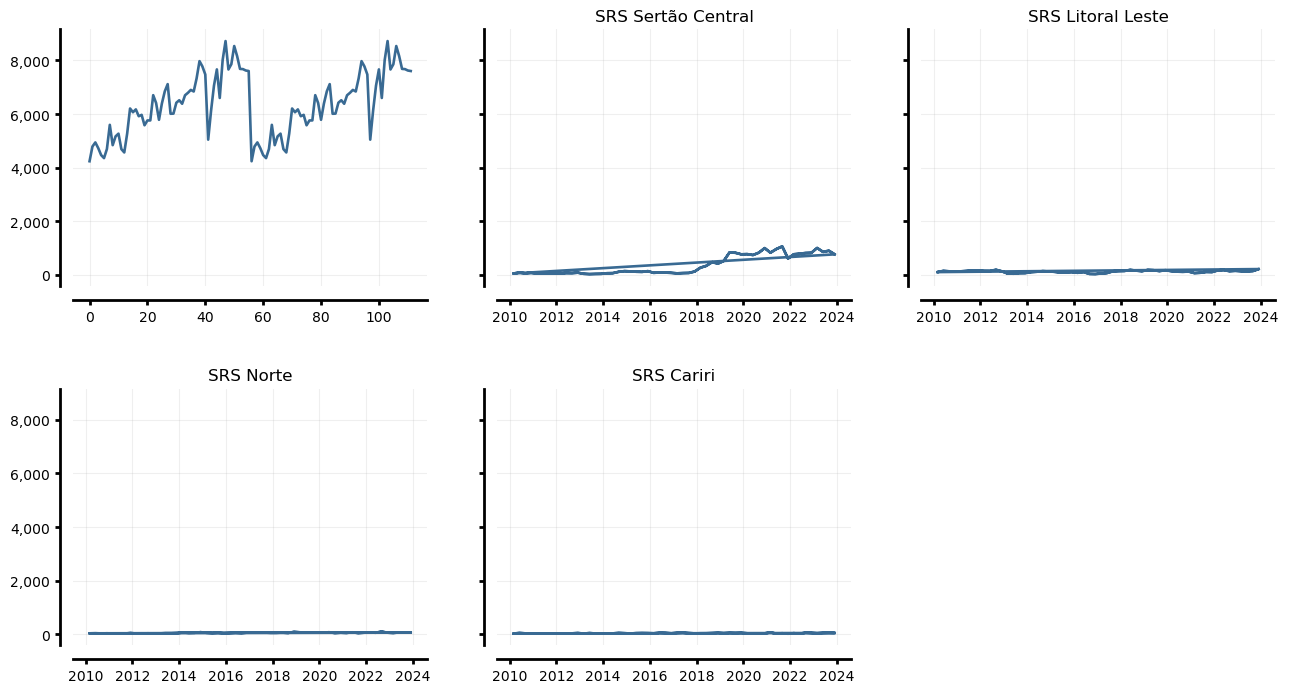

In [86]:
fig, AX = plt.subplots(2,3, figsize=(15.5,8), sharey=True)

AX[0,0].set_title(macro_original_dict[1].replace("Superintendência Regional de Saúde", "SRS"))
linein, = AX[0,0].plot(testx, macro_flows["1"]["INCOMING"], color="#396a93", lw=1.9)
lineout, = AX[0,0].plot(list_of_xaxis, macro_flows["1"]["OUTGOING"], color="#e1374b", lw=1.9)
lineins, = AX[0,0].plot(list_of_xaxis, macro_flows["1"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[0,1].set_title(macro_original_dict[2].replace("Superintendência Regional de Saúde", "SRS"))
AX[0,1].plot(testx, macro_flows["2"]["INCOMING"], color="#396a93", lw=1.9)
AX[0,1].plot(list_of_xaxis, macro_flows["2"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[0,1].plot(list_of_xaxis, macro_flows["2"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[0,2].set_title(macro_original_dict[3].replace("Superintendência Regional de Saúde", "SRS"))
AX[0,2].plot(testx, macro_flows["3"]["INCOMING"], color="#396a93", lw=1.9)
AX[0,2].plot(list_of_xaxis, macro_flows["3"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[0,2].plot(list_of_xaxis, macro_flows["3"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[1,0].set_title(macro_original_dict[4].replace("Superintendência Regional de Saúde", "SRS"))
AX[1,0].plot(testx, macro_flows["4"]["INCOMING"], color="#396a93", lw=1.9)
AX[1,0].plot(list_of_xaxis, macro_flows["4"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[1,0].plot(list_of_xaxis, macro_flows["4"]["INTERNAL"], color='#4d4d4d', ls="--")

AX[1,1].set_title(macro_original_dict[5].replace("Superintendência Regional de Saúde", "SRS"))
AX[1,1].plot(testx, macro_flows["5"]["INCOMING"], color="#396a93", lw=1.9)
AX[1,1].plot(list_of_xaxis, macro_flows["5"]["OUTGOING"], color="#e1374b", lw=1.9)
AX[1,1].plot(list_of_xaxis, macro_flows["5"]["INTERNAL"], color='#4d4d4d', ls="--")

fig.legend([linein, lineout, lineins], ['in-flow', 'out-flow', 'internal'], loc=4, bbox_to_anchor=((0.78,0.1)), prop={'size':15})

AX[1,2].axis('off')


for i in range(2):
    for j in range(3):
        AX[i,j].grid(alpha=0.2, zorder=0)
        for sp in ['left', 'right', 'bottom', 'top']:
            AX[i,j].spines[sp].set_linewidth(2)
            AX[i,j].spines[sp].set_position(('outward', 10))
        AX[i,j].spines['right'].set_linewidth(0)
        AX[i,j].spines['top'].set_linewidth(0)
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
        AX[i,j].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        AX[i,j].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        AX[i,j].tick_params(width=2)

fig.subplots_adjust(hspace=0.4)
    